In [1]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
import matplotlib.pyplot as plt



### Loading and visualizing data

In [2]:
train_data = datasets.MNIST(root="data/", train=True, download=True, transform=transforms.ToTensor())
test_data = datasets.MNIST(root="data/", train=False, download=True, transform=transforms.ToTensor())

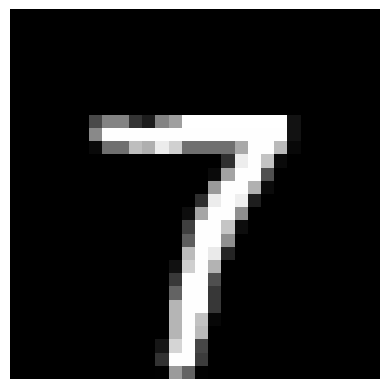

In [13]:
sample_idx = torch.randint(len(train_data), size=(1,)).item()
img, label = train_data[sample_idx]
plt.axis("off")
plt.imshow(img.squeeze(), cmap="gray")
plt.show()

In [14]:
img.size()

torch.Size([1, 28, 28])

In [16]:
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=32)

### Defining our model

In [25]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1) # nn.Conv2d(1, 32, 3, 1, padding=(1, 1))
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        
        self.fc1 = nn.Linear(9216, 128) 
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        
        x = self.dropout2(x)
        x = self.fc2(x)
        x = F.log_softmax(x, dim=1)
        return x

In [26]:
model = MnistModel()

In [29]:
no_params = sum(p.numel() for p in model.parameters() if p.requires_grad)

In [30]:
no_params

1199882

### How to debug/develop

In [17]:
l = nn.Conv2d(1, 32, 3, 1)

In [18]:
t = l(train_data[1][0])

In [20]:
train_data[1][0].shape

torch.Size([1, 28, 28])

In [19]:
t.shape

torch.Size([32, 26, 26])

In [21]:
l2 = nn.Conv2d(32, 64, 3, 1)

In [22]:
t2 = l2(t)

In [23]:
t2.shape

torch.Size([64, 24, 24])

In [24]:
64 * 12 *12

9216

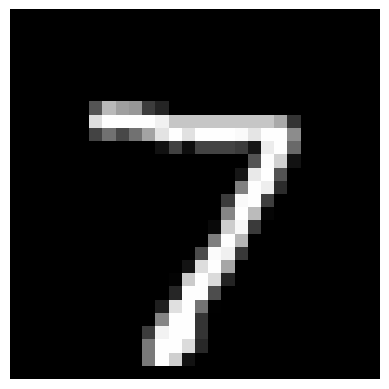

In [32]:
img, label = test_data[0]
plt.axis('off')
plt.imshow(img.squeeze(), cmap='gray')
plt.show()

In [33]:
model.eval()
with torch.no_grad():
    preds = model(test_data[0][0].unsqueeze(dim=0))

In [35]:
preds.argmax()

tensor(2)

### Writing training and evaluation codes

In [36]:
def train(model, train_loader, optimizer, epoch):
    model.train()
    
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 ==0:
            print(f"Triain Epoch: {epoch} Loss: {loss.item():.6f}")